In [1]:
#Importing necessary libraries for code
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

TASK 1: 


In [2]:
# Task 1 
#a) Loading the dataset 

df =pd.read_csv("Churn_Modelling.csv")
df.head()  #Exploring the dataset
df.shape

(10000, 14)

The dataset has 10000 data observations (row) and 14 columns. 

In [3]:
#Check column list and missing values
column_list = list(df)

print (column_list )


['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


The column list includesL Row number, customer_id, surname, credit Score, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCar, IsActiveMember, EstimatedSalary, Exited]

In [4]:
#For NA Values:  
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

According to the value above, there are no missing values in any of the columns. 


In [5]:
#Get unique count for each column 
counts = df.nunique()
print(counts)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


Both row numbers and customer ID has 10000 unique values which is understandable as they could be unique to each observations. The columns that have the highest unique values then are estimated salary, balance and surname.  Credit score then has highest count of unique vlaues followed by age. Others tends to have less unique value counts than 10.

In [6]:
#Drop the columns “RowNumber”, “CustomerId”, and “Surname” 

df = df.drop(labels = ["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Confirming that the column has been dropped. 
df.shape

(10000, 11)

We see that the columns have been dropped as in the shape of df, the column reduced from 14 to 11 i.e it dropped that 3 columns we listed. 

## Task 2 

Plot a pie chart to show the proportion of customer exited and retained. The column 
‘Exited’ = 1 means the customer exited; ‘Exited’ = 0 means the customer retained. It 
should look like the following plot. 

In [8]:
df["Exited"].value_counts()  #Counting the values to confirm


0    7963
1    2037
Name: Exited, dtype: int64

There are 7963 values in Exited with 0 value and 2037 observations with Exited value as 1.

In [9]:
#Creating required value for the pie chart
retained = df.loc[df["Exited"] == 0].count()[0] 
retained 
exited = df.loc[df["Exited"] == 1].count()[0]
exited 

exited_class = [retained,exited] 
labels = ["Retained", "Exited"]
myexplode = [0, 0.2] 

<IPython.core.display.Javascript object>


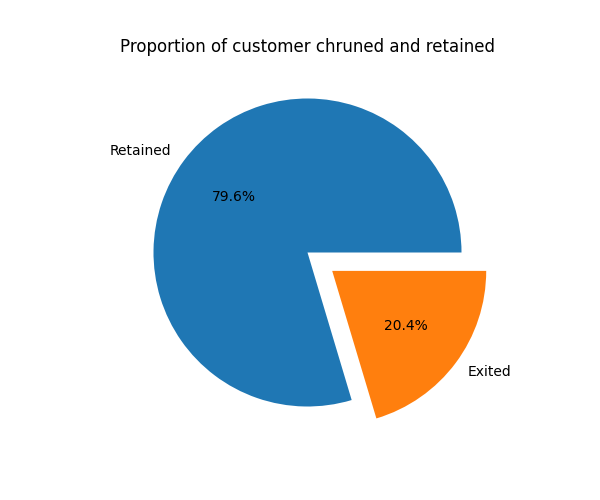

In [10]:
plt.figure(1,figsize = (6,5))
plt.pie(exited_class, labels = labels, autopct = '%1.1f%%', explode = myexplode)  #Using 1 percentage point and explode to slice Exited value
plt.title('Proportion of customer chruned and retained');

plt.show()

Plot a bar graph to show the relation between the column “exited” with each of the 
categorical variables (“Geography”, “Gender”, “HasCrCard”, “IsActiveMember”). See 
the bar graph below. 

In [11]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

There are 5014 observations for France, 2509 for Germany and 2477 for Spain 


<IPython.core.display.Javascript object>


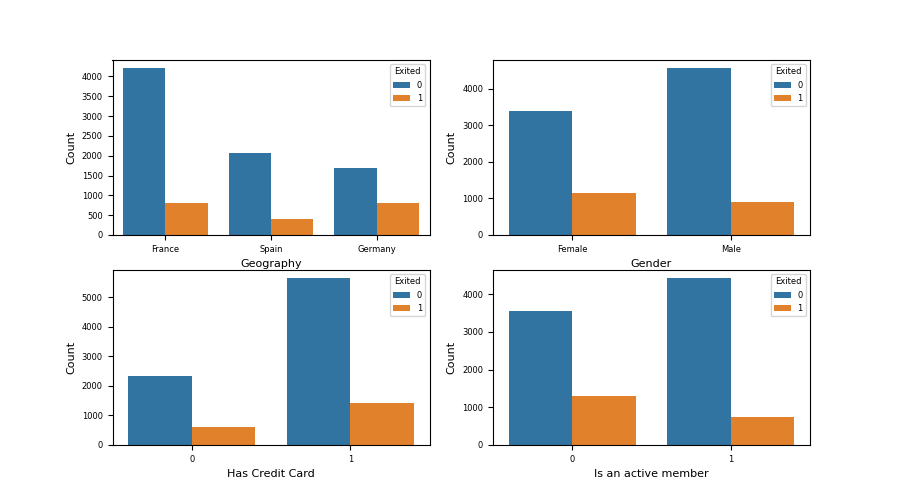

Text(0, 0.5, 'Count')

In [12]:
plt.figure(2,figsize = (9,5)) 

#Changing the size of the label to make it easier to read 
plt.rcParams['font.size'] = 6  

#Creating the 1st sub plot:

plt.subplot(2,2,1)   # 2 rows, 2 columns, 1st position 
sns.countplot(data=df, x="Geography", hue= "Exited")
plt.xlabel('Geography', fontsize = 8)
plt.ylabel('Count', fontsize = 8)


#2nd figure
plt.subplot(2,2,2)
sns.countplot(data=df, x="Gender", hue = "Exited")
plt.xlabel('Gender', fontsize = 8)
plt.ylabel('Count', fontsize = 8)


#3rd figure

plt.subplot(2,2,3)
sns.countplot(data=df, x="HasCrCard", hue = "Exited")
plt.xlabel('Has Credit Card', fontsize = 8)
plt.ylabel('Count', fontsize = 8)


# 4th figure

plt.subplot(2,2,4)
sns.countplot(data=df, x="IsActiveMember", hue = "Exited")
plt.xlabel('Is an active member', fontsize = 8)
plt.ylabel('Count', fontsize = 8)



 Part c : BOXPLOT 

<IPython.core.display.Javascript object>


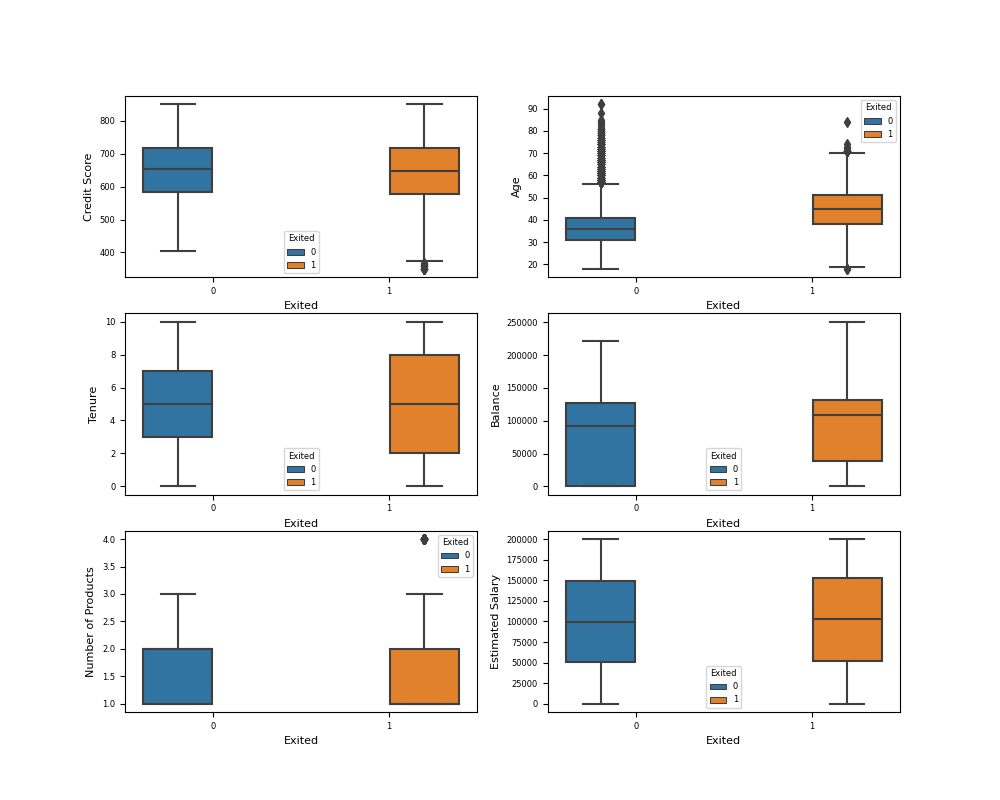

Text(0, 0.5, 'Estimated Salary')

In [13]:
plt.figure(3,figsize = (10,8)) 

#Changing the size of the label to make it easier to read 
plt.rcParams['font.size'] = 6  


#Creating the 1st sub plot:

plt.subplot(3,2,1)   # 2 rows, 2 columns, 1st position 
sns.boxplot(data=df, x="Exited", y = "CreditScore", hue = "Exited")
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Credit Score', fontsize = 8)


#2nd figure
plt.subplot(3,2,2)
sns.boxplot(data=df, x="Exited", y = "Age", hue = "Exited")
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Age', fontsize = 8)


#3rd figure

plt.subplot(3,2,3)
sns.boxplot(data=df, x="Exited", y = "Tenure", hue = "Exited")
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Tenure', fontsize = 8)


# 4th figure

plt.subplot(3,2,4)
sns.boxplot(data=df, x="Exited", y = "Balance", hue = "Exited")
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Balance', fontsize = 8) 

plt.subplot(3,2,5)
sns.boxplot(data=df, x="Exited", y = "NumOfProducts", hue = "Exited")
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Number of Products', fontsize = 8)

plt.subplot(3,2,6)
sns.boxplot(data=df, x="Exited", y = "EstimatedSalary", hue = "Exited")
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Estimated Salary', fontsize = 8)

## TASK 3 
# Prepare Data

# PART A)

BalanceSalaryRatio. It is calculated by the column “Balance”/the column 
“EstimatedSalary” 
b. TenureByAge. It is calculated by the column “Tenure”/the column “Age”. 

In [14]:
#Creating new column and adding them to the df. Calculating column based on column values already in the dataset.
df["BalanceSalaryRatio"] = df["Balance"]/df["EstimatedSalary"]
df["TenureByAge"] = df["Tenure"]/df["Age"]
df["CreditScoreGivenAge"] = df["CreditScore"]/df["Age"]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


Change the value 0 in the column “HasCrCard” to -1; Also change the value 0 in the 
column “IsActiveMember” to -1. 

In [15]:
print(df['HasCrCard'].unique())

[1 0]


Initially we see that the unique values for Has Credit card is 1 and 0. After following code, we can see that the credit card now has value -1, 1

In [16]:
df['HasCrCard'] = df['HasCrCard'].replace(0, -1) #Replacing 0 with 1 
print(df['HasCrCard'].unique())

[ 1 -1]


 Also change the value 0 in the column “IsActiveMember” to -1. 
 

In [17]:
print(df['IsActiveMember'].unique())   #Using similar apporach for Is Active member column 
df['IsActiveMember'] = df['IsActiveMember'].replace(0, -1)
print(df['HasCrCard'].unique())    
#The value 0 has now been converted to -1. 

[1 0]
[ 1 -1]


One hot encode the categorical variables “Geography” and “Gender”. See below for a  few sample values. 
This could also be done using get_dummies but I interpreted the question as requiring the use of library OneHotEncoder 

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Gender']]).toarray())
encoder_df.columns = encoder.get_feature_names(['Gender'])

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

final_df['Gender_Female'] = final_df['Gender_Female'].astype(int) #Converting the column into integer to replace 0 to -1 
final_df['Gender_Male'] = final_df['Gender_Male'].astype(int)
final_df['Gender_Female'] = final_df['Gender_Female'].replace(0,-1)
final_df['Gender_Male'] = final_df['Gender_Male'].replace(0,-1)

#view final df
final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,-1
1,608,Spain,Female,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268,1,-1
2,502,France,Female,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381,1,-1
3,699,France,Female,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077,1,-1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1,-1


In [20]:
# For Geography: 
geography_df = pd.DataFrame(encoder.fit_transform(df[['Geography']]).toarray())
geography_df.columns = encoder.get_feature_names(['Geography'])
final_df = final_df.join(geography_df)

final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,-1,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268,1,-1,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381,1,-1,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077,1,-1,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1,-1,0.0,0.0,1.0


In [21]:
#Converting the geography 
final_df[['Geography_France','Geography_Germany','Geography_Spain']] = final_df[['Geography_France', 'Geography_Germany','Geography_Spain']].astype(int)
final_df[['Geography_France','Geography_Germany','Geography_Spain']] = final_df[['Geography_France', 'Geography_Germany','Geography_Spain']].replace(0,-1)

final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,-1,1,-1,-1
1,608,Spain,Female,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268,1,-1,-1,-1,1
2,502,France,Female,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381,1,-1,1,-1,-1
3,699,France,Female,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077,1,-1,1,-1,-1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1,-1,-1,-1,1


In [22]:
#Drop Gender and Geography

final_df.drop(columns = ["Geography", "Gender"], inplace = True)
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,-1,1,-1,-1
1,608,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268,1,-1,-1,-1,1
2,502,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381,1,-1,1,-1,-1
3,699,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077,1,-1,1,-1,-1
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1,-1,-1,-1,1


In [23]:

#Converting column list to float for further analysis
col_to_norm = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio','TenureByAge', 'CreditScoreGivenAge']

final_df[col_to_norm] = final_df[col_to_norm ].astype(float) 
final_df.info()   # Confirming all reqd columns has float as datatype. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  float64
 1   Age                  10000 non-null  float64
 2   Tenure               10000 non-null  float64
 3   Balance              10000 non-null  float64
 4   NumOfProducts        10000 non-null  float64
 5   HasCrCard            10000 non-null  int64  
 6   IsActiveMember       10000 non-null  int64  
 7   EstimatedSalary      10000 non-null  float64
 8   Exited               10000 non-null  int64  
 9   BalanceSalaryRatio   10000 non-null  float64
 10  TenureByAge          10000 non-null  float64
 11  CreditScoreGivenAge  10000 non-null  float64
 12  Gender_Female        10000 non-null  int32  
 13  Gender_Male          10000 non-null  int32  
 14  Geography_France     10000 non-null  int32  
 15  Geography_Germany    10000 non-null  

In [24]:
#final_df.info() 

In [25]:
Normalized_age = lambda x: (x - x.min())/(x.max() - x.min())  #Function to min_max normalization for machine learning
col_list = ["CreditScore","Age", "Tenure","Balance", "NumOfProducts", "EstimatedSalary","BalanceSalaryRatio", "TenureByAge", "CreditScoreGivenAge"]
final_df[col_list] = final_df[col_list].apply(Normalized_age)
final_df.head() #ensure that all the items in col_list are normalzied and have values ranging from 0 to 1 



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083,1,-1,1,-1,-1
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,0.000070,0.043902,0.237252,1,-1,-1,-1,1
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,0.000132,0.342857,0.168807,1,-1,1,-1,-1
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,0.000000,0.046154,0.310859,1,-1,1,-1,-1
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739,1,-1,-1,-1,1


## TASK 4
MACHINE LEARNING

In [26]:
X = final_df.drop(labels = ["Exited"], axis = 1) #Creating X for independent variables

Y = final_df["Exited"] #Y i.e predictor is Exited
#print(X)
#print(Y)


In [27]:
#Importing libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
#Splitting X and Y to train and test for train the model and evaluating the model (train and test)
(X_train,X_test, Y_train, Y_test) = train_test_split(X,Y,test_size = 0.20, random_state = 0)


In [29]:
logisticreg = LogisticRegression(max_iter = 3000) #Using logistic regression modelling
logisticreg.fit(X_train, Y_train) #Training the model
y_pred = logisticreg.predict(X_test) #Predicting the model 


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score #Confusion and accuracy library to evaluate the created model

In [31]:
confusion_mat = confusion_matrix(Y_test, y_pred) #Confusion matric 
confusion_mat



array([[1535,   60],
       [ 306,   99]], dtype=int64)

From the confusion matrix, we can see the array for true postive, false negative, true negative and false negative as outlined above. 

In [32]:
#Calculating accuracy 
accuracy = accuracy_score(Y_test, y_pred)*100
accuracy

81.69999999999999

The accuracy of our predicted model is 81.699%